In [38]:
import cv2 as cv 
import numpy as np
import pandas as pd

from flytracker.utils import FourArenasQRCodeMask
import matplotlib.pyplot as plt 
from flytracker.components import Frame


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
frame = 0
cap = cv.VideoCapture('../../data/movies/4arenas_QR.mp4') #video_name is the video being called
cap.set(1, frame); # Where frame_no is the frame you want
image = Frame(cap.read()[1], mask = FourArenasQRCodeMask().mask) # Read the frame

In [63]:
thresholded_frame = cv.threshold(image(), 120, 255, cv.THRESH_BINARY_INV)[1]
fly_pixels = np.stack(np.where(thresholded_frame != 0)).T[:, ::-1].astype('float32') # to get y and x good

In [64]:
fly_pixels.shape

(2099, 2)

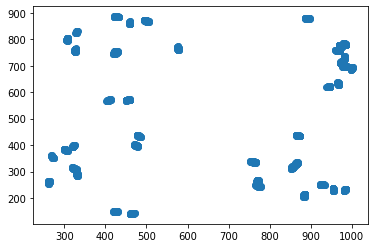

In [42]:
plt.scatter(fly_pixels[:, 0], fly_pixels[:, 1])

In [32]:
%%time
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 300, 1e-4)
locations = cv.kmeans(fly_pixels, 40, None, criteria, 1 ,cv.KMEANS_PP_CENTERS)[2]

CPU times: user 7.42 ms, sys: 3.49 ms, total: 10.9 ms
Wall time: 3.92 ms


In [33]:
center

array([[864.9608 , 330.39218],
       [481.5111 , 434.2    ],
       [983.2127 , 697.1276 ],
       [499.71698, 869.3585 ],
       [324.71014, 310.73914],
       [326.47827, 758.28986],
       [424.60464, 149.53488],
       [769.74243, 262.9394 ],
       [891.3953 , 879.4186 ],
       [983.27026, 231.51352],
       [927.7709 , 250.5    ],
       [576.33966, 765.81134],
       [964.8605 , 757.44183],
       [407.91998, 569.54   ],
       [424.4176 , 750.03296],
       [943.5476 , 620.5476 ],
       [321.38095, 395.64285],
       [869.04254, 436.2553 ],
       [759.6053 , 337.2237 ],
       [465.16278, 141.7907 ],
       [426.78262, 885.45654],
       [884.381  , 210.3651 ],
       [262.31818, 260.04547],
       [307.24445, 799.6667 ],
       [459.5319 , 861.8936 ],
       [270.85   , 355.375  ],
       [474.5862 , 398.72415],
       [454.73587, 570.7547 ],
       [982.80005, 782.2    ],
       [954.6471 , 232.45099],
       [855.377  , 316.29507],
       [329.975  , 828.25   ],
       [

In [7]:
ret

28904.868517294526

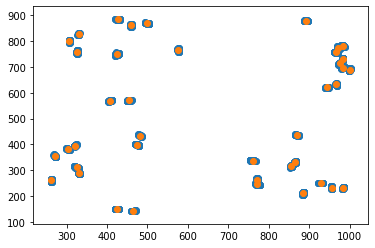

In [8]:
plt.scatter(fly_pixels[:, 0], fly_pixels[:, 1])
plt.scatter(center[:, 0], center[:, 1])

In [9]:
from sklearn.cluster import KMeans

In [10]:
%%time
estimator = KMeans(n_clusters=40, n_init=1)
estimator.fit(fly_pixels)

CPU times: user 29.7 ms, sys: 3.36 ms, total: 33.1 ms
Wall time: 24.7 ms


KMeans(n_clusters=40, n_init=1)

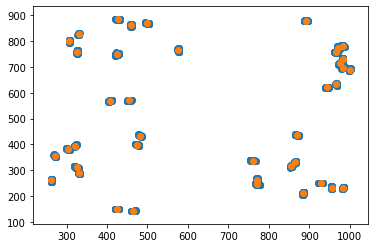

In [71]:
plt.scatter(fly_pixels[:, 0], fly_pixels[:, 1])
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1])

In [57]:
estimator.inertia_

28904.859375

In [29]:
import cv2 as cv 
import numpy as np
import pandas as pd

from flytracker.utils import run_tracker_C, run_tracker_python
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%%time
df = run_tracker_python(1000, n_flies=40)

CPU times: user 44.3 s, sys: 4.14 s, total: 48.4 s
Wall time: 13.7 s


In [31]:
%%time
df = run_tracker_C(1000, n_flies=40)

CPU times: user 18.1 s, sys: 1.79 s, total: 19.9 s
Wall time: 10.4 s


In [74]:
%%time
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 300, 1e-4)
compactness, labels, centers = cv.kmeans(fly_pixels, 40, None, criteria, 10, cv.KMEANS_PP_CENTERS) 

CPU times: user 91.4 ms, sys: 32.3 ms, total: 124 ms
Wall time: 35.2 ms


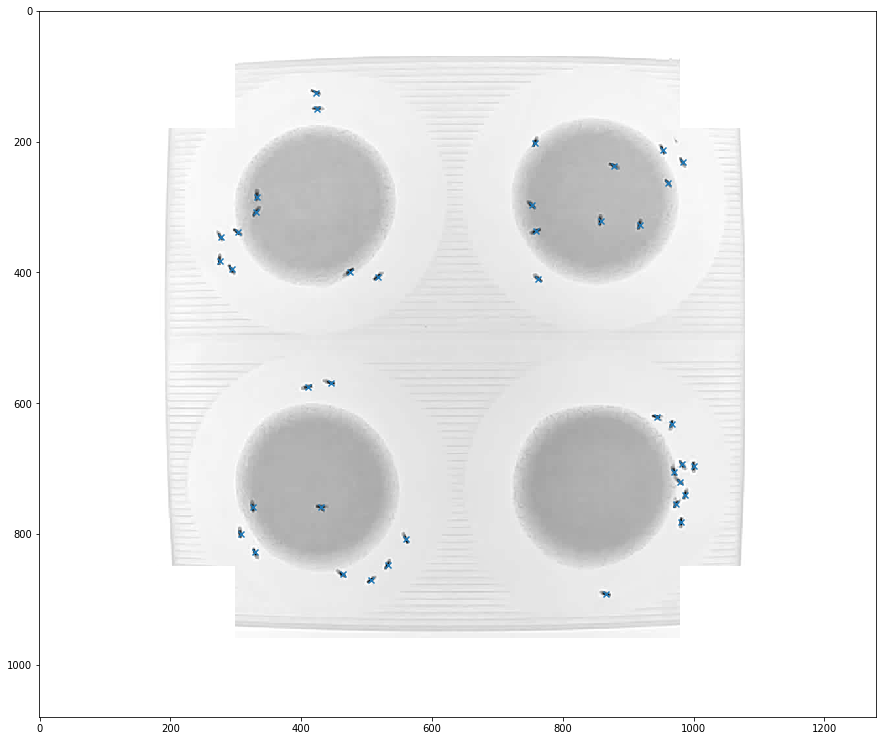

In [75]:
#plt.scatter(fly_pixels[:, 0], fly_pixels[:, 1])
plt.figure(figsize=(15, 15))
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
plt.imshow(image(), cmap='gray')

In [67]:
compactness

30408.027366471477

In [68]:
labels

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [12],
       [12],
       [12]], dtype=int32)

In [72]:
%%time
compactness, labels, centers = cv.kmeans(fly_pixels, 40, labels, criteria, 1, cv.KMEANS_USE_INITIAL_LABELS)

CPU times: user 1.53 ms, sys: 929 µs, total: 2.46 ms
Wall time: 647 µs


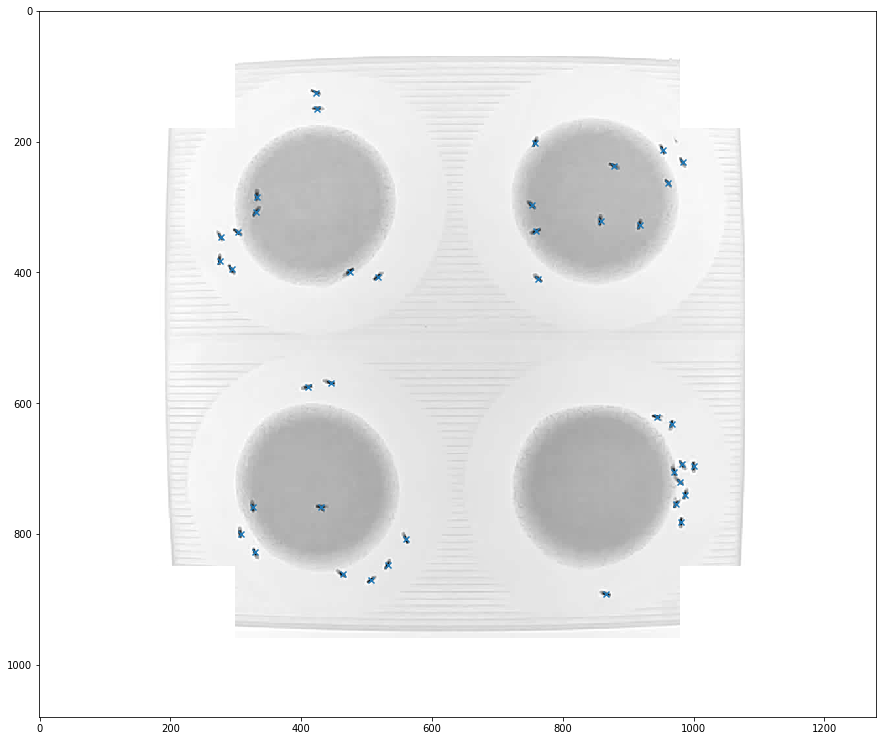

In [73]:
#plt.scatter(fly_pixels[:, 0], fly_pixels[:, 1])
plt.figure(figsize=(15, 15))
plt.scatter(centers[:, 0], centers[:, 1], marker='x')
plt.imshow(image(), cmap='gray')